FFBP includes two visualization functions for vieweing data structures contained in runlog files. In this tutorial we will demonstrate how these are used to visualize data generated by running neural network models.

Let's begin by importing the two functions and setting up a path variable. We will be using a test runlog that we've prepared earlier:

In [1]:
from FFBP.vis_utils import view_progress, view_layers

example = '/Users/alexten/Projects/pdpyflow/tutorials/building_models/logdirs/logdir_000'

/Users/alexten/Environments/pdpyflow_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Viewing training progress with `view_progress()`
The function `view_progress` plots the training loss across time. It takes the following arguments:
- **`logdir`** : the required string path to the log directory which contains at least one runlog file, from which data will be extracted for viewing. Note that you can use either an absolute or a relative (i.e. relative to the notebook) path to the log directory. 
- **`gaussian_smoothing`** : (*`default`*`=0`) : is an optional argument that assigns the degree of gaussian smoothing applied by the following function (adapted from [code](https://www.swharden.com/wp/2008-11-17-linear-data-smoothing-in-python/) by Scott Harden):
```python
def smooth_Gaussian(data, degree=5):
    window=degree*2-1
    weight=np.array([1.0]*window)
    weightGauss=[]

    for i in range(window):
        i=i-degree+1
        frac=i/float(window)
        gauss=1/(np.exp((4*(frac))**2))
        weightGauss.append(gauss)

    weight=np.array(weightGauss)*weight
    smoothed=[0.0]*(len(data) - window)

    for i in range(len(smoothed)):
        smoothed[i]= sum(np.array(data[i:i + window]) * weight) / sum(weight)

    return smoothed
```


<IPython.core.display.Javascript object>


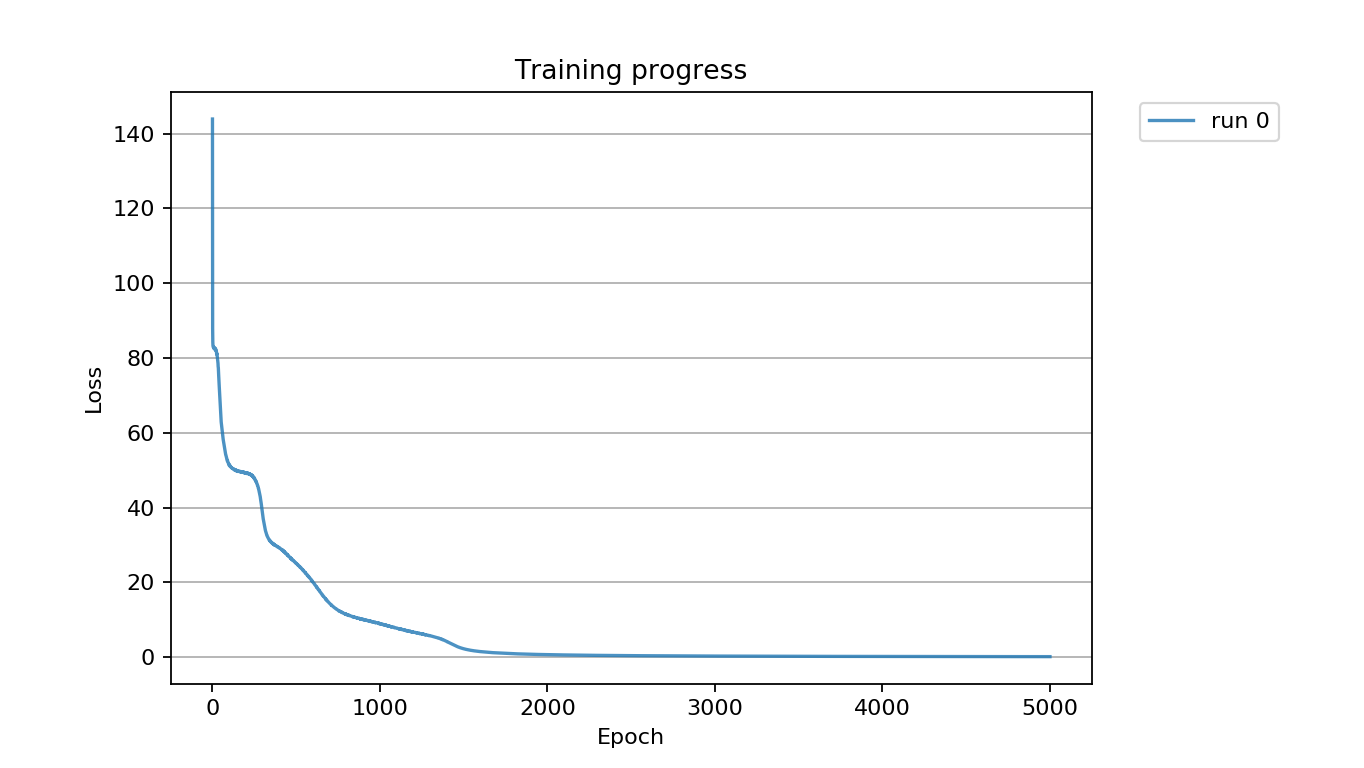

In [2]:
view_progress(
    logdir = example,
    gaussian_smoothing = 0
)

## Viewing model states with `view_layers()`
The function `view_layers()` is an interactive tool for displaying model states at different time steps. Each layer of the viewed model is displayed in a row of cell grids, where each grid is labeled by the data it represents. Depending on the mode of viewing, you can display layer inputs, weights, biases, net input, activation, and various gradient information. The information displayed can be controled by interactive widgets, each labeled descriptively. If you hover over an individual cell, its numeric value will appear on the control panel. You can resize the figure by dragging the little handle at the bottom-right corner. You can also minimize the figure window to scroll over it by clicking at the area to the left of the corresponding (notebook) cell output. Finally, you can export the figure to one of the available file formats by clicking at the disc icon on the bottob toolbar. 

The following arguments are accepted: 

- **`logdir`** : the required string path to the log directory which contains at least one runlog file, from which data will be extracted for viewing. Note that you can use either an absolute or a relative (i.e. relative to the notebook) path to the log directory. 
- **`mode`** : (*`default`*`=0`) the mode of vieiwing for which there are three options, encoded as `0`, `1`, and `2` respectively. In mode `0` only forward propagation information is displayed (layer input, layer weights and biases, net input and layer output) for each individual pattern in the test set. Mode `1` adds backprop information (partial derivatives of error with repspect to layer input, layer weights and biases, net input and output / activation). Finally, mode `2` is the same as mode `1`, but also displays the sum of all partial derivatives with respect to each weight (and bias) for all patterns in the test set. 
- **`ppc`** : (*`default`*`=20`) the number of pixels per cell. This will adjust the size of grid cells. You should only need this parameter if the visualization is poorly spaced (e.g. overlapping labels or figures) or otherwise defective.

<IPython.core.display.Javascript object>


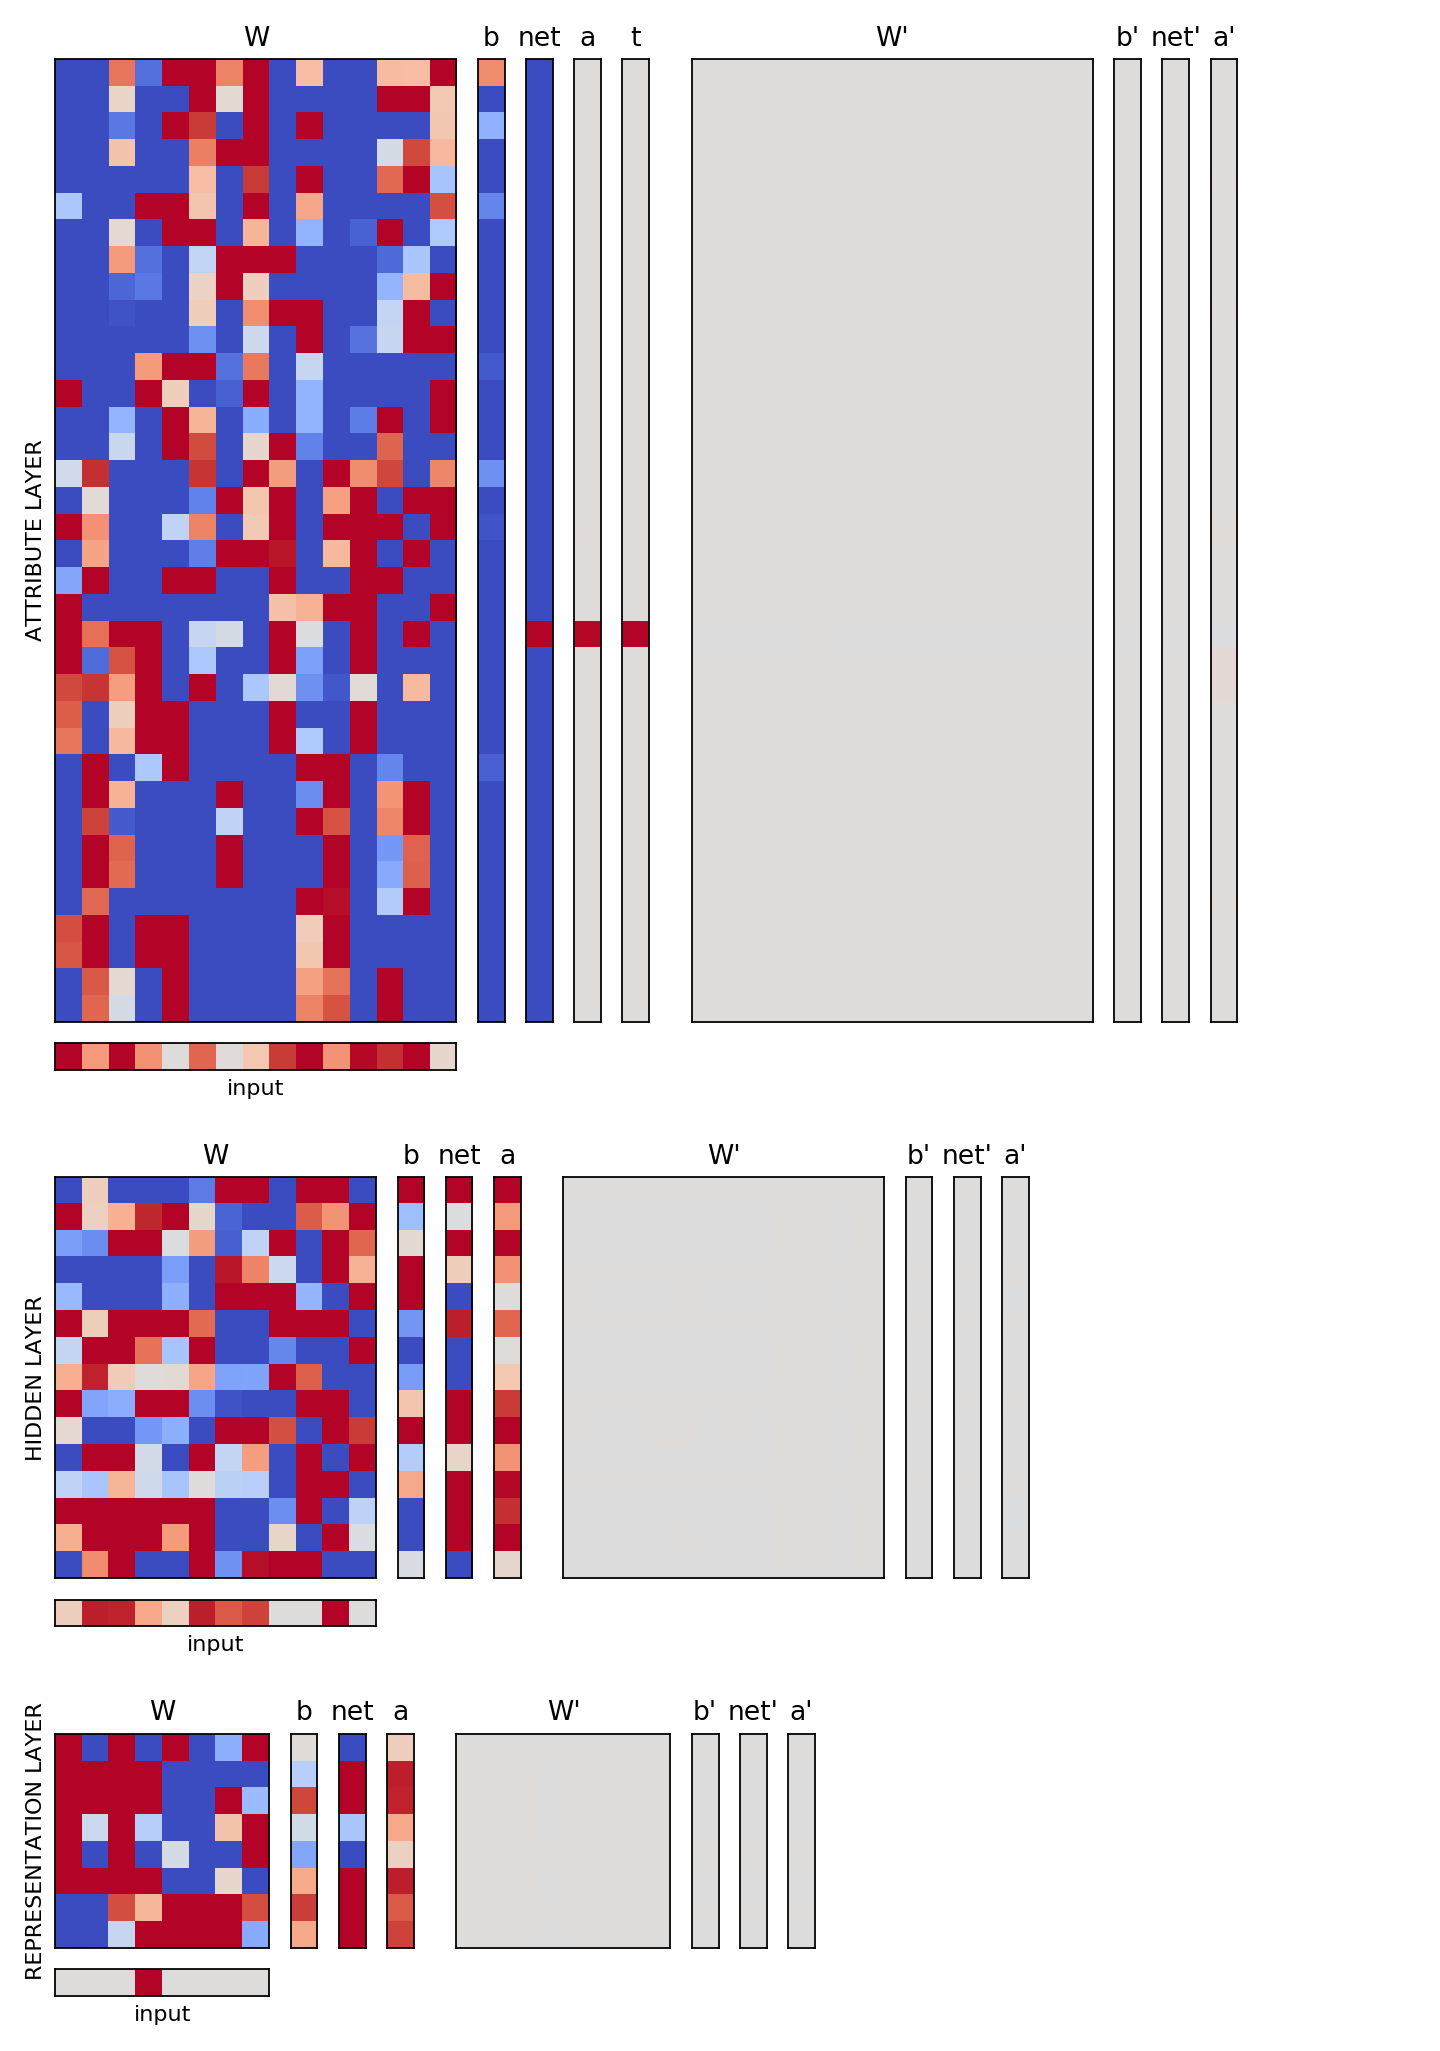

In [3]:
view_layers(
    logdir = example, 
    mode = 1
)